<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/GS_v0.1%20-%20Prueba%20Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

<ipython-input-2-dc6dd172c19c>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')


In [3]:
import pickle

with open('/content/drive/MyDrive/vocabulary.voc', 'rb') as f:
    inter = pickle.load(f)

# Gensim

In [91]:
import nltk
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [134]:
new_inter=[]
for elem in list(inter): 
  new_inter.append(elem.split(' '))
new_inter = [tuple(x) for x in new_inter]

In [142]:
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)

def text_preprocessing(text):

    # Convert words to lower case
    text = text.lower()
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 
    text=text.translate(trans)

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    text=list(nltk.bigrams(text))

    new_text=[]
    for elem in text: 
      if elem in new_inter: new_text.append(elem)
    text=new_text
    return text

In [ ]:
base['Intervention_Clean_List'] = list(map(text_preprocessing, base.tokens))

In [14]:
base['Intervention_Clean_List'][2]

''

In [ ]:
import numpy as np
vocab=np.array(vocab)

In [ ]:
vocab

array(['visto meno', 'favorec movilidad', 'digo reflexion', ...,
       'permitido traer', 'impos contestar', 'concurso proyecto'],
      dtype='<U39')

In [ ]:
import gensim

# Create Dictionary
id2word = gensim.corpora.Dictionary(vocab)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in base['tokens']]

TypeError: ignored

# Un LDA con iterations=50 y topics=15

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=15, max_iter=50, learning_method='batch', learning_offset=50.,random_state=0)   

In [ ]:
lda.fit(matrix)

LatentDirichletAllocation(learning_offset=50.0, max_iter=50, n_components=15,
                          random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
guardia civil , cuerpo seguridad , ministerio interior , fuerza cuerpo , medio comunicacion , asunto exterior , ministerio asunto , fuerza seguridad , seguridad vial , ministerio cultura , policia guardia , victima terrorismo , proteccion civil , policia nacion , cuerpo nacion , nacion policia , fuerza armada , relacion cort , gobernador civil , institucion penitenciaria
Topic 2:
tribun constitucion , codigo penal , articulo constitucion , ordenamiento juridico , exposicion motivo , sentencia tribun , texto alternativo , toma consideracion , tribun supremo , poder publico , derecho fundamental , seguridad juridica , derecho libertad , cort general , disposicion adicion , codigo civil , hace referencia , ejercicio derecho , articulo codigo , ponencia comision
Topic 3:
poder judici , administracion publica , consejo poder , funcion publica , fuerza armada , administracion justicia , sistema nacion , nacion salud , ministerio sanidad , ministerio justicia , servicio publico , san

In [ ]:
import numpy as np
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp

In [ ]:
def display_topics_frex(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(frex(model)):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
display_topics_frex(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
guardia civil , cuerpo seguridad , ministerio interior , fuerza cuerpo , policia guardia , policia nacion , cuerpo nacion , nacion policia , cuerpo fuerza , consumo droga , civil policia , fuert rumor , vigilancia aduanera , director guardia , servicio vigilancia , direccion policia , protesta banco , seguridad privada , modelo polici , biblioteca nacion
Topic 2:
codigo penal , articulo codigo , derecho penal , recurso previo , derecho comparado , penal militar , secreto profesion , privativa libertad , libertad catedra , libertad religiosa , tecnica legislativa , proyecto codigo , justicia militar , pena privativa , tipo penal , potestad sancionadora , clausula conciencia , codigo justicia , privacion libertad , derecho intimidad
Topic 3:
consejo poder , sistema nacion , nacion salud , administracion justicia , juec magistrado , atencion primaria , justicia gratuita , profesional sanitario , oficina judici , publico justicia , demarcacion planta , funcionario civil , secretar

# LASSO por legislatura

In [ ]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
frex_df=pd.DataFrame(frex(lda))

In [ ]:
# Topic que presenta mayor FREX para cada bigrama
d = []
feature_names=vect.get_feature_names_out()
for n in enumerate(feature_names):
    d.append(
        {
            'N': n[0],
            'Bigrama': n[1],
            'Topic':  frex_df[n[0]].argsort()[9]
        }
    )

bi_topic_frex=pd.DataFrame(d)
bi_topic_frex.head(20)

,N,Bigrama,Topic
0,0,abierto competitivo,22
1,1,abierto comunidad,1
2,2,abierto consenso,18
3,3,abierto considerar,3
4,4,abierto cualquier,4
5,5,abierto debat,2
6,6,abierto dialogar,26
7,7,abierto dialogo,0
8,8,abierto dicho,11
9,9,abierto discusion,20


In [ ]:
# Relevancia de bigramas en la predicción por legislatura
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

tabla=[]
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
n=5

macro=[]
weighted=[]

lr = LogisticRegression(penalty='l1', max_iter=50, solver='liblinear')
cv=CountVectorizer(ngram_range=[2,2], stop_words=stopwords ,vocabulary=inter)

for x in legislaturas: 
  try: 
    base_year=base[base.legislatura==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s=lr.coef_[0]
    print(f"Legislatura: {x} - Most Frecuent Topic: {mode(bi_topic_frex['Topic'][argsort(s)])}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)    

Legislatura: I - Most Frecuent Topic: 25
+---------------------+--------------------+---------------------+---------------------+--------------------+
|   nombr centrista   |    duda ninguna    | articulo mantenida  |  libertad libertad  |   articulo pausa   |
| -3.5490828581682665 | -3.529689873618588 | -2.890094806415368  | -2.8048361625156693 | -2.650019610952798 |
|         19          |         13         |          4          |          4          |         16         |
| formacion politica  |   cualquier caso   | solucionar problema |    reunion junta    |   pasamo examen    |
|  2.173435654587356  | 2.187134722009388  |  2.261429000180524  |  2.57009079185584   | 2.7545625260807696 |
|         19          |         16         |         20          |          4          |         6          |
+---------------------+--------------------+---------------------+---------------------+--------------------+
Legislatura: II - Most Frecuent Topic: 25
+--------------------+---------------

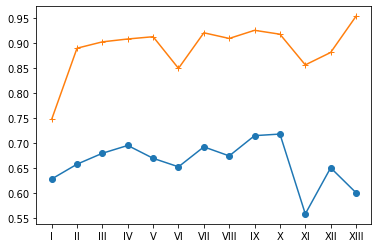

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(legislaturas, macro, marker='o')
plt.plot(legislaturas, weighted, marker='+')

# LASSO por año

In [ ]:
# Relevancia de bigramas en la predicción por año
macro=[]
weighted=[]
tabla=[]

nombres=cv.get_feature_names_out()
componentes=lda.components_.transpose()
n = 5
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')

for x in range (1979, 2020): 
  try: 
    base_year=base[pd.DatetimeIndex(base.fecha).year==x]
    X_train, X_test, y_train, y_test = train_test_split(base_year.loc[:, base_year.columns != 'party'], base_year['party'], test_size=0.33, random_state=42)
    train_matrix = vect.fit_transform(X_train['tokens'])
    test_matrix = vect.transform(X_test['tokens'])  
    lr.fit(train_matrix,y_train)
    predictions = lr.predict(test_matrix )
    macro.append(f1_score(predictions,y_test, average='macro'))
    weighted.append(f1_score(predictions,y_test, average='weighted'))
    s = lr.coef_[0]
    print(f"Año: {x}")
    print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))
  except: 
    macro.append(np.nan)
    weighted.append(np.nan)  

Año: 1979
+----------------------+--------------------+--------------------+---------------------+---------------------+
|  publicada boletin   |  correspond ahora  |    misma razon     |      quier uso      | ultima intervencion |
| -2.5218990738169986  | -2.484730768320344 | -1.927122454354577 | -1.7392070088156875 | -1.7292375766944237 |
|          2           |         18         |         22         |         26          |         27          |
| ministerio educacion |  orador precedido  |    ningun tipo     | ministerio hacienda | formacion politica  |
|  0.9631667923531337  | 1.0052004720859211 | 1.0454232467083464 | 1.1904020253778183  | 1.9685194611315822  |
|          1           |         4          |         10         |         16          |         19          |
+----------------------+--------------------+--------------------+---------------------+---------------------+
Año: 1980
+---------------------+----------------------+---------------------+---------------------+--

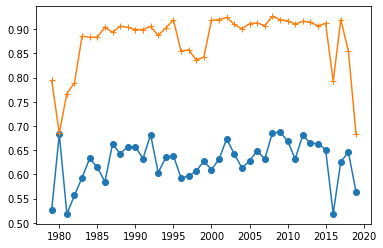

In [ ]:
# Yo entiendo que el resultado relevante es el macro, porque considera el desbalance de clases
import matplotlib.pyplot as plt
plt.plot(range(1979,2020), macro, marker='o')
plt.plot(range(1979,2020), weighted, marker='+')

# LASSO overall

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base.loc[:, base_year.columns != 'party'], base['party'], test_size=0.33, random_state=42)
train_matrix = vect.fit_transform(X_train['tokens'])
test_matrix = vect.transform(X_test['tokens'])  
lr.fit(train_matrix,y_train)
predictions = lr.predict(test_matrix )
print(f1_score(predictions,y_test, average='macro'))
print(f1_score(predictions,y_test, average='weighted'))
s = lr.coef_[0]
print(tabulate([cv.get_feature_names_out()[argsort(s)[:n]], sorted(s)[:n],bi_topic_frex['Topic'][argsort(s)[:n]],cv.get_feature_names_out()[argsort(s)[-n:]], sorted(s)[-n:],  bi_topic_frex['Topic'][argsort(s)[-n:]]], tablefmt='pretty'))

0.6475387217556144
0.7020823929685404
+--------------------+--------------------+--------------------+--------------------+--------------------+
|  dirigida conform  |  termino derivado  |  pausa procedemo   |   numero formula   |  referido senado   |
| -4.563681677054712 | -4.495718308321066 | -4.467618083910903 | -4.313275449741695 | -4.286983575562812 |
|         1          |         10         |         6          |         19         |         1          |
|   seccion pausa    |    fijar pausa     |  turismo comercio  |      cd pausa      |  confeder podemo   |
|  4.33726717396521  |  4.52381138588459  | 4.564551166688844  | 4.824276187524637  | 4.919688887474812  |
|         25         |         4          |         6          |         18         |         24         |
+--------------------+--------------------+--------------------+--------------------+--------------------+


# Topic por discurso por weight

In [ ]:
base.shape

(334421, 21)

In [ ]:
matrix

<334421x270230 sparse matrix of type '<class 'numpy.int64'>'
	with 8479733 stored elements in Compressed Sparse Row format>

In [ ]:
lda.components_.shape

(15, 270230)

In [ ]:
disc_weights=matrix*lda.components_.transpose()

In [ ]:
base['Topic_weight']=disc_weights.argmax(axis=1)+1

In [ ]:
base.head()

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,congreso,senado,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",9
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,"4 (C, I, II, III)",–,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",9
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",10
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",10
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,"6 (C, I, II, III, IV, V)",–,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",10


# Topic por discurso por frex

In [ ]:
import scipy as sp
from scipy.special import logsumexp
import numpy as np

In [ ]:
def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

In [ ]:
def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size

In [ ]:
def t_FREX(row):
  return frex_df[matrix[row['id']].argmax()].argsort()[9]

In [ ]:
frex_df=pd.DataFrame(frex(lda))

In [ ]:
# Ejemplo de Topic por FREX de acuerdo al bigrama más presente en ese discurso
discurso=2
print(f"Bigrama más usado: {matrix[discurso].argmax()}")
print(f"Topic: {frex_df[matrix[discurso].argmax()].argsort()[9]}")

Bigrama más usado: 3547
Topic: 7


In [ ]:
base['id']=range(0,334421)

In [ ]:
# Se crea una columna con el topic que se asigna por frex a cada discurso de la base
base['Topic_FREX']=base.apply (lambda row: t_FREX(row), axis=1)+1

In [ ]:
base.head(5)

,Unnamed: 0,orden,namex,intervention,fecha,legislatura,pleno,role,oradorx,namey,...,total,oradory,cataluna,estatut,inter_raw,partido,tokens,Topic_weight,id,Topic_FREX
0,0,"LECTURA DEL REAL DECRETO. DE CONVOCATORIA, DE ...",PRESIDENTE PROVISIONAL (Fraile Poujade),"Señoras y señores Diputados, se abre la sesió...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['señora', 'señor', 'diputado', 'abr', 'junta'...",9,0,6
1,1,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL,(Fraile Poujade): Según la relación que cons....,1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,FRAILE POUJADE,"Fraile Poujade, Modesto †",...,4.0,FRAILE POUJADE,0.0,0.0,NaN,"UCD, AP-PDP, CP","['frail', 'poujad', 'segun', 'relacion', 'con'...",9,1,9
2,2,DESIGNACION DE LA MESA DE EDAD,PRESIDENTE PROVISIONAL (Rodríguez Valverde),"Siguiendo el orden del día, ruego al señor Es...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['siguiendo', 'ruego', 'esperabe', 'arteaga', ...",10,2,8
3,3,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Ro.dríguez Valverde),"Al reanudarse la sesión, procedería dar lectu...",1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RO.DRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['reanudars', 'procederia', 'dar', 'lectura', ...",10,3,3
4,4,CONSTITUCION INTERINA DE LA CAMA. RA Y ELECCIO...,PRESIDENTE PROVISIONAL (Rodríguez Valverde),Una vez leído el informe de la Junta Electora...,1979-03-23,I,1.0,PRESIDENTE PROVISIONAL,RODRIGUEZ VALVERDE,"Rodríguez Valverde, León Máximo †",...,6.0,RODRIGUEZ VALVERDE,0.0,0.0,NaN,PSOE,"['leido', 'inform', 'junta', 'elector', 'centr...",10,4,1


In [ ]:
# Promedio general de bigramas únicos por discurso
(matrix != 0).sum(1).mean()

25.356460868187106

# Gráficos

In [ ]:
base['Topic_FREX'].unique()

array([ 6,  9,  8,  3,  1, 11, 15,  2, 14, 10,  5, 13, 12,  4,  7])

In [ ]:
base['Year']=pd.DatetimeIndex(base.fecha).year
base['Month']=pd.DatetimeIndex(base.fecha).month

In [ ]:
import datetime
def get_mode_list(x):
    mode = pd.Series.mode(x)
    return mode[0] if isinstance(mode, pd.Series) else [mode]

graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_FREX'].agg(get_mode_list)

In [ ]:
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

In [ ]:
import matplotlib.pyplot as plt

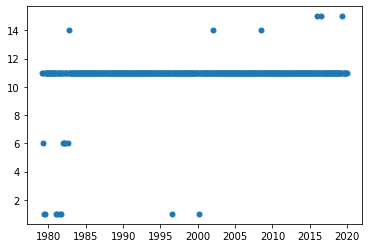

In [ ]:
# By Month
plt.plot(graf.date, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

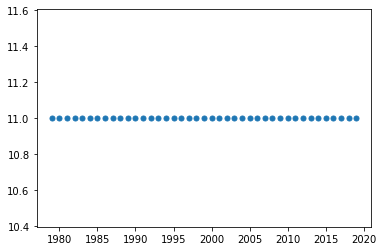

In [ ]:
# By Year
graf=base.groupby(['Year'], as_index=False)['Topic_FREX'].agg(get_mode_list)
plt.plot(graf.Year, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

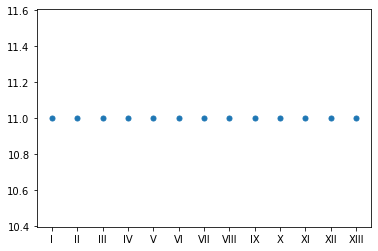

In [ ]:
# By Legislatura
graf=base.groupby(['legislatura'], as_index=False)['Topic_FREX'].agg(get_mode_list)
graf['id']=[1,2,3,4,9,5,6,7,8,10,11,12,13]
graf=graf.sort_values('id')
plt.plot(graf.legislatura, graf.Topic_FREX, linewidth=0, markersize=5, marker='o')

Ahora para weights

In [ ]:
base['Topic_weight'].unique()

array([ 9, 10,  1, 13,  5,  2,  8, 14, 12,  3,  7,  4, 15, 11,  6])

In [ ]:
graf=base.groupby(['Year', 'Month'], as_index=False)['Topic_weight'].agg(get_mode_list)
graf['date'] = graf.apply(lambda x: datetime.datetime(x['Year'], x['Month'], 1), axis=1)

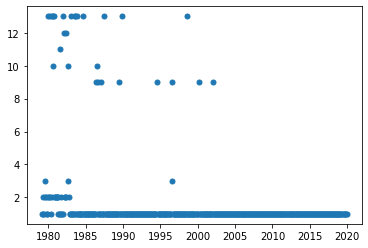

In [ ]:
# By Month
plt.plot(graf.date, graf.Topic_weight, linewidth=0, markersize=5, marker='o')

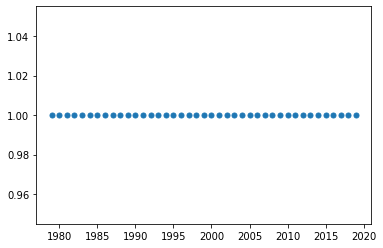

In [ ]:
# By Year
graf=base.groupby(['Year'], as_index=False)['Topic_weight'].agg(get_mode_list)
plt.plot(graf.Year, graf.Topic_weight, linewidth=0, markersize=5, marker='o')

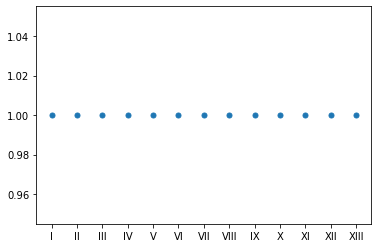

In [ ]:
# By Legislatura
graf=base.groupby(['legislatura'], as_index=False)['Topic_weight'].agg(get_mode_list)
graf['id']=[1,2,3,4,9,5,6,7,8,10,11,12,13]
graf=graf.sort_values('id')
plt.plot(graf.legislatura, graf.Topic_weight, linewidth=0, markersize=5, marker='o')

# Topics no mode

In [ ]:
# Cantidad total de discursos asignados a cada topic por weight
# El discurso se asigna a un topic multiplicando los bigramas que aparecen en el discurso por la probabilidad de pertenencia de ese bigrama a cada topic y sumando, luego el topic con mayor probabilidad se asigna como topic del discurso
base['Topic_weight'].value_counts()

1     128226
9      38105
13     32089
10     23047
12     19474
2      17769
8      14541
3      10278
6       8951
11      7773
4       7693
7       7593
5       6907
15      6722
14      5253
Name: Topic_weight, dtype: int64

In [ ]:
# Cantidad total de discursos asignados a cada topic por Frex
# El discurso se asigna a un topic multiplicando los bigramas que aparecen en el discurso por la probabilidad de pertenencia de ese bigrama a cada topic y sumando, luego el topic con mayor probabilidad se asigna como topic del discurso
base['Topic_FREX'].value_counts()

11    129149
14     29944
1      27959
6      25331
13     18327
15     15106
10     14971
9      13700
4      10638
8       9960
7       8486
3       8170
2       8072
5       7723
12      6885
Name: Topic_FREX, dtype: int64

In [ ]:
# Por LEGISLATURA por WEIGHTS
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
topics_por_legislatura=pd.DataFrame()
for x in legislaturas: 
  base_legislatura=base[base.legislatura==x]
  topics_por_legislatura[x]=base_legislatura['Topic_weight'].value_counts().sort_index()
topics_por_legislatura

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII
1,1525,10220,8699,13207,10095,11542,14889,14205,14330,19729,456,8757,572
2,1442,3237,1647,1786,1534,1982,1463,1404,956,1313,39,890,76
3,372,1054,864,1069,804,1405,1153,915,668,1266,2,675,31
4,276,712,474,605,492,771,879,613,1037,1204,23,594,13
5,93,172,283,387,274,532,808,895,1006,1007,27,1368,55
6,156,597,553,640,870,1984,1177,687,565,1204,18,446,54
7,379,1264,1018,1260,706,699,434,594,445,566,8,204,16
8,326,1092,876,1139,867,1291,1662,1143,2580,2499,35,974,57
9,521,4291,3914,3831,2713,5540,6923,3643,2300,2782,67,1511,69
10,855,2892,1850,2508,1432,2287,2533,2871,2076,2435,96,1114,98


In [ ]:
# Por LEGISLATURA por FREX
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
topics_por_legislatura=pd.DataFrame()
for x in legislaturas: 
  base_legislatura=base[base.legislatura==x]
  topics_por_legislatura[x]=base_legislatura['Topic_FREX'].value_counts().sort_index()
topics_por_legislatura

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII
1,966,3830,2376,2546,1756,3046,3827,2688,2053,2753,44,1968,106
2,237,984,704,770,626,988,871,730,644,1102,27,369,20
3,302,1086,658,872,562,1009,943,873,705,787,16,339,18
4,368,1543,900,893,706,1202,1172,1213,951,1033,24,605,28
5,185,595,587,798,423,906,926,826,821,1097,17,498,44
6,812,2997,2028,2646,1664,2861,2935,2791,2265,2571,57,1620,84
7,280,1017,798,1128,561,879,737,1180,776,745,18,344,23
8,270,970,751,1089,740,1137,1318,1145,929,1010,19,538,44
9,590,1686,1126,1348,1197,1698,1449,1278,1154,1393,31,720,30
10,533,2010,1731,1238,1136,1586,1760,1395,1600,1269,31,637,45


In [ ]:
# Por AÑO por FREX
topics_por_año=pd.DataFrame()
for x in range (1979, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  topics_por_año[x]=base_year['Topic_FREX'].value_counts().sort_index()
topics_por_año

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,219,425,209,125,1467,1259,952,442,827,876,...,496,501,712,741,716,580,263,758,831,266
2,73,80,44,45,317,344,273,127,208,285,...,176,127,279,294,257,266,74,132,154,56
3,67,119,71,52,386,346,296,142,202,252,...,197,172,216,243,203,122,51,143,133,46
4,93,165,69,50,551,491,433,199,284,353,...,262,215,265,292,261,212,77,239,268,73
5,53,56,30,55,188,212,154,119,190,235,...,252,180,266,339,302,188,99,161,203,96
6,198,322,161,155,996,967,885,338,601,798,...,631,472,670,743,640,509,218,609,694,240
7,65,118,57,42,367,325,273,146,242,341,...,185,149,172,213,186,171,74,127,133,51
8,72,101,59,45,315,318,291,133,208,294,...,270,210,244,323,269,168,67,219,216,100
9,163,208,123,102,600,545,456,225,347,427,...,340,270,381,390,345,275,117,265,318,81
10,176,195,94,80,635,701,565,257,610,718,...,471,335,346,365,316,242,122,223,266,102


In [ ]:
# Por AÑO por weights
topics_por_año=pd.DataFrame()
for x in range (1979, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  topics_por_año[x]=base_year['Topic_weight'].value_counts().sort_index()
topics_por_año

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,385,656,314,234,3278,3430,2861,1528,2385,3573,...,4242,3638,5113,5601,4916,4043,1394,3383,3741,1267
2,338,623,300,198,1245,1035,800,267,537,653,...,274,213,286,381,363,282,141,339,383,142
3,117,108,81,69,276,394,321,149,258,364,...,166,163,290,349,339,288,66,251,335,56
4,100,80,47,55,251,280,154,75,140,172,...,297,250,306,295,343,254,108,240,215,67
5,38,29,16,10,41,58,63,30,83,124,...,291,223,251,282,277,195,180,546,549,175
6,47,63,32,14,191,203,179,94,173,216,...,146,107,314,373,302,214,104,180,149,85
7,115,139,83,62,404,427,353,189,336,391,...,128,73,124,118,214,109,15,75,96,42
8,88,126,80,67,426,326,274,149,276,326,...,853,548,779,727,561,418,127,350,423,167
9,149,219,94,79,1378,1409,1283,624,1274,1613,...,650,428,707,754,736,569,275,606,607,160
10,227,329,169,166,950,949,752,458,538,701,...,515,454,607,713,594,495,226,369,479,234
